## 2a :

In [1]:
import matplotlib.pyplot as plt
import os
import cv2
from pathlib import Path
from skimage.color import rgb2gray
from skimage import io, exposure
import xml.etree.ElementTree as ET
from PIL import Image

mydataset=[
    "n02105641-Old_English_sheepdog",
    "n02109961-Eskimo_dog",
    "n02093256-Staffordshire_bullterrier",
    "n02113624-toy_poodle"
]

In [2]:
class ResizeImage:
    def __init__(self, dataset):
        self.root_address = os.getcwd()
        self.images_folder_address = os.path.join(self.root_address, "images")
        self.annotation_folder_address = os.path.join(self.root_address, "Annotation")
        self.dataset = dataset
        
    def get_bbox(self, annot):
        xml = annot
        tree = ET.parse(xml)
        root = tree.getroot()
        objects = root.findall('object')
        bbox = []
        for o in objects:
            bndbox = o.find("bndbox")
            xmin = int(bndbox.find("xmin").text)
            ymin = int(bndbox.find("ymin").text)
            xmax = int(bndbox.find("xmax").text)
            ymax = int(bndbox.find('ymax').text)
            bbox.append((xmin, ymin, xmax, ymax))
        return bbox

    def fetch_all_images(self, annotation_path):
        image_file_name = f"{os.path.splitext(os.path.basename(annotation_path))[0]}.jpg"
        my_dataset_catg = os.path.basename(os.path.dirname(annotation_path))
        all_images = os.path.join(self.images_folder_address, my_dataset_catg, image_file_name)
        return all_images

    def crop_images(self, image_path, bboxes):
        org_image = Image.open(image_path);
        for i, bbbox in enumerate(bboxes):
            cropped_image = org_image.crop(bbbox).resize((128,128), Image.LANCZOS)
            orignal_img_name = os.path.basename(image_path)
            new_path = f"{os.path.splitext(orignal_img_name)[0]}_section_{i}{os.path.splitext(orignal_img_name)[1]}"
            save_path = os.path.join("myDataSetCroppedImagesFolder", new_path)
            Path(save_path).parent.mkdir(parents=True, exist_ok=True)
            cropped_image.convert("RGB").save(save_path)   

    def _get_annotation_from_bbox(self):
        annotations = []
        for breed in self.dataset:
            breed_path = os.path.join(self.annotation_folder_address, breed) 
            for file_name in os.listdir(breed_path):
                file_path = os.path.join(breed_path, file_name)  
                if not os.path.isdir(file_path): 
                    annotations.append(file_path)
        return annotations

    def showOutput(self):
        for i, annot in enumerate(self._get_annotation_from_bbox(), start = 1):
            bounding_boxes = self.get_bbox(annot)
            image_file = self.fetch_all_images(annot)

            print(f"Cropping the images: {i}/{len(self._get_annotation_from_bbox())}")
            self.crop_images(image_file, bounding_boxes)            

In [3]:
cropImage = ResizeImage(mydataset)
cropImage.showOutput()

Cropping the images: 1/625
Cropping the images: 2/625
Cropping the images: 3/625
Cropping the images: 4/625
Cropping the images: 5/625
Cropping the images: 6/625
Cropping the images: 7/625
Cropping the images: 8/625
Cropping the images: 9/625
Cropping the images: 10/625
Cropping the images: 11/625
Cropping the images: 12/625
Cropping the images: 13/625
Cropping the images: 14/625
Cropping the images: 15/625
Cropping the images: 16/625
Cropping the images: 17/625
Cropping the images: 18/625
Cropping the images: 19/625
Cropping the images: 20/625
Cropping the images: 21/625
Cropping the images: 22/625
Cropping the images: 23/625
Cropping the images: 24/625
Cropping the images: 25/625
Cropping the images: 26/625
Cropping the images: 27/625
Cropping the images: 28/625
Cropping the images: 29/625
Cropping the images: 30/625
Cropping the images: 31/625
Cropping the images: 32/625
Cropping the images: 33/625
Cropping the images: 34/625
Cropping the images: 35/625
Cropping the images: 36/625
C

## 2b :

In [4]:
import matplotlib.pyplot as plt 
from skimage import io, color, filters, exposure
import numpy as np

In [19]:
class ImageEdgeFilter:
    def __init__(self, dataset):
        self.root_address = os.getcwd()
        self.images_folder_address = os.path.join(self.root_address, "images")
        self.annotation_folder_address = os.path.join(self.root_address, "Annotation")
        self.dataset = dataset

    def get_two_image_from_class(self, class_dir):
        files = [file for file in os.listdir(class_dir) if file.endswith(".jpg")]
        all_images = [os.path.join(class_dir, img) for img in files[5:7]]
        return all_images

    def process_image(self):
        imgs = [img for img_dir in self.dataset for img in self.get_two_image_from_class(img_dir)]
        org_img = [io.imread(path) for path in imgs]
        gray_img = [color.rgb2gray(img) for img in org_img]
        edge_img = [filters.sobel(img) for img in gray_img]
        return org_img, gray_img, edge_img

    def display_analysis(self):
        org_imgs, gray_imgs, edge_imgs = self.process_image()
        totalLength = len(gray_imgs)
        fig, axes = plt.subplots(totalLength, 3, figsize = (15, 5 * totalLength))

        for i in range(totalLength):
            grayImg = axes[i, 0] if totalLength > 1 else axes[0]
            grayImg.imshow(gray_imgs[i], cmap="gray")
            grayImg.set_title("GrayScale Image")
            grayImg.axis("off")
            
            edges = axes[i, 1] if totalLength > 1 else axes[1]
            edges.imshow(edge_imgs[i], cmap="gray")
            edges.set_title("Sobel Edge Detection")
            edges.axis("off")

            histo = axes[i, 2] if totalLength > 1 else axes[2]
            histo.hist(gray_imgs[i].ravel(), bins=256, range=[0, 1],color='green', alpha=0.7)
            histo.set_title("Histogram")

        plt.tight_layout()
        plt.show()
            

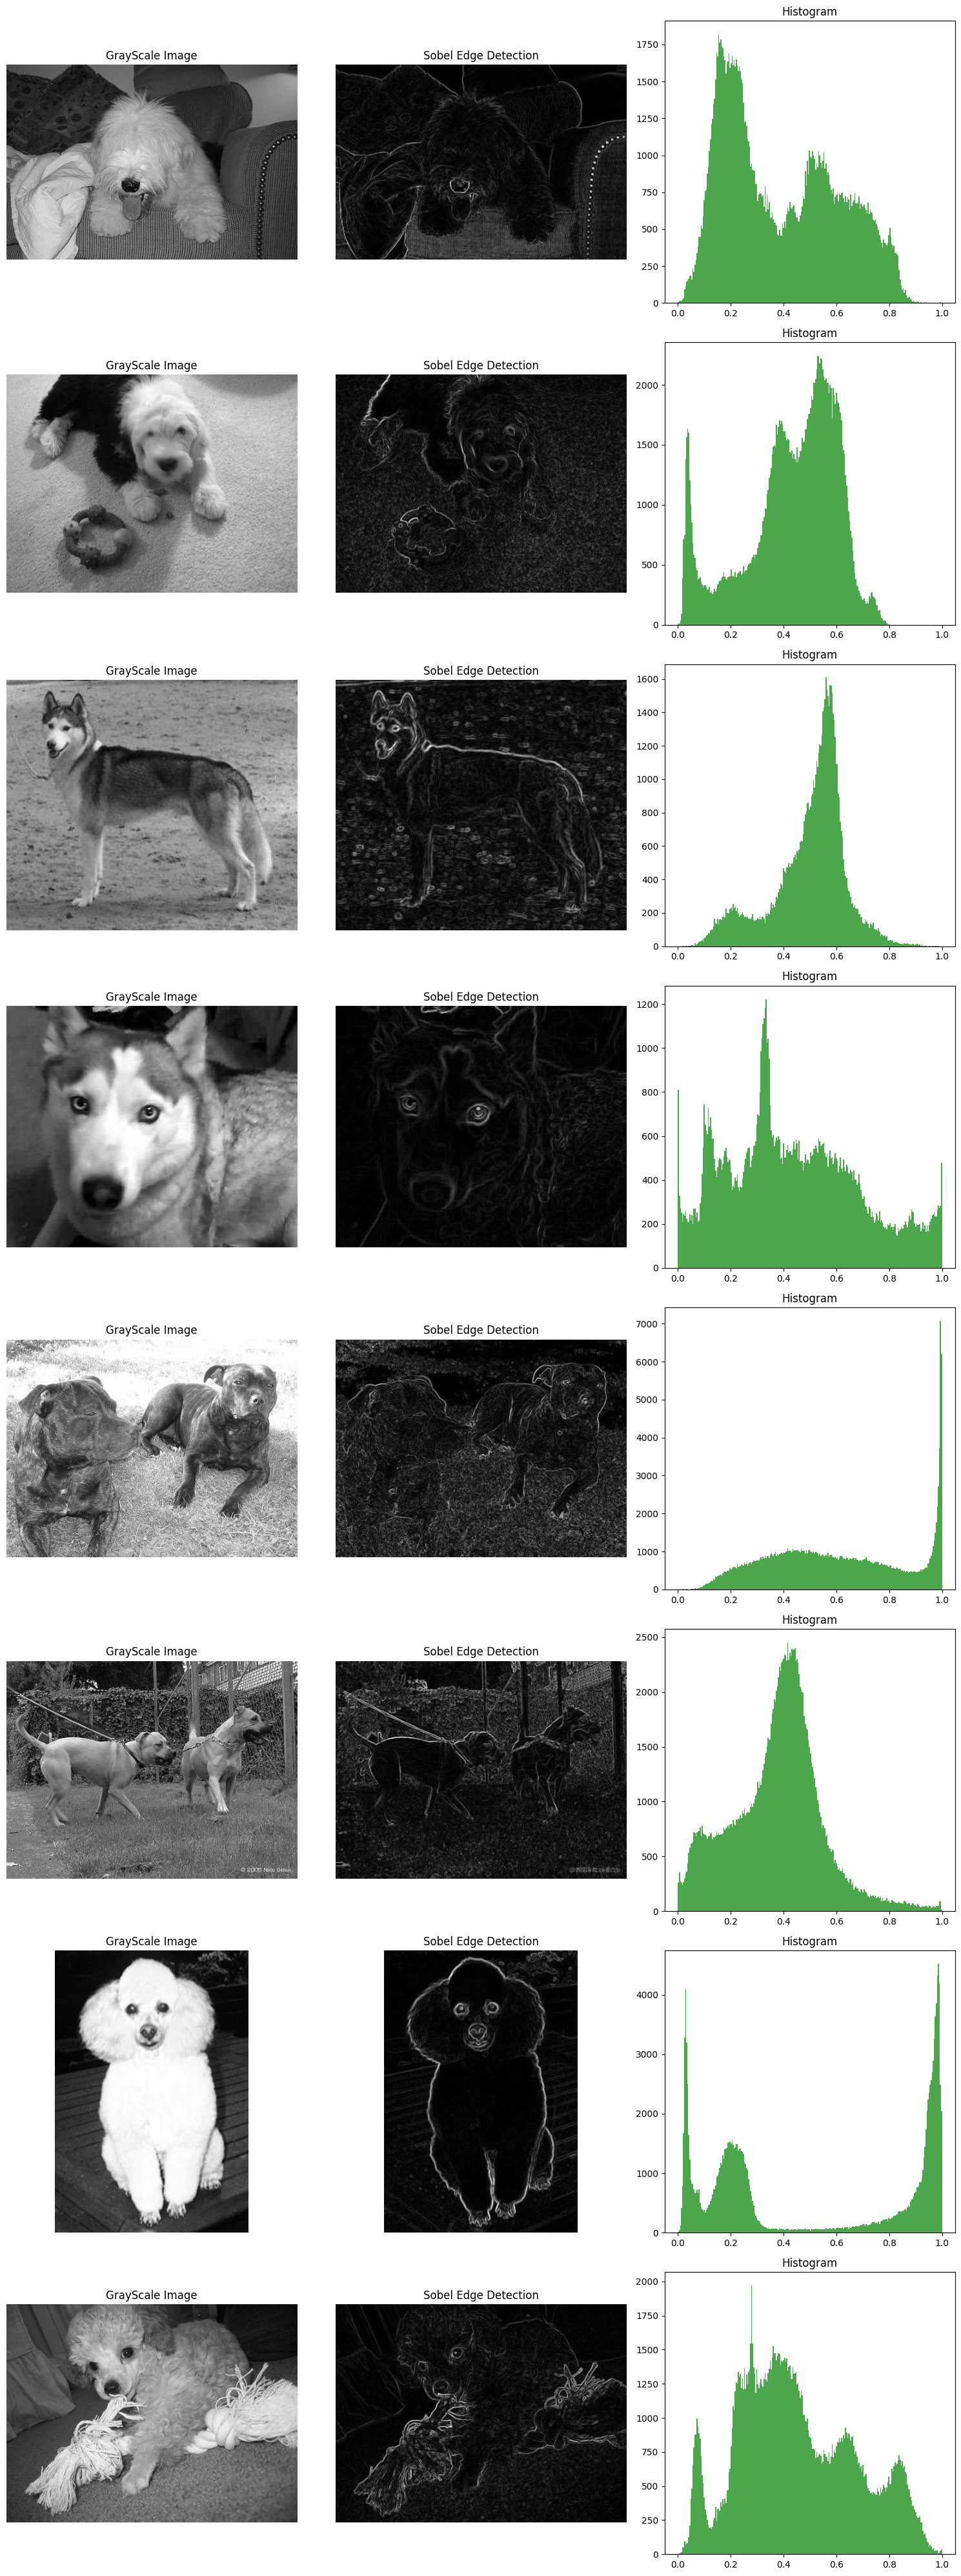

In [20]:
mydataset=[
     "images/n02105641-Old_English_sheepdog",
    "images/n02109961-Eskimo_dog",
    "images/n02093256-Staffordshire_bullterrier",
    "images/n02113624-toy_poodle"
]

imageFilterAnalysis = ImageEdgeFilter(mydataset)
imageFilterAnalysis.display_analysis()

## 2c :

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.patches as patches
from skimage import io, color, filters, exposure
import os

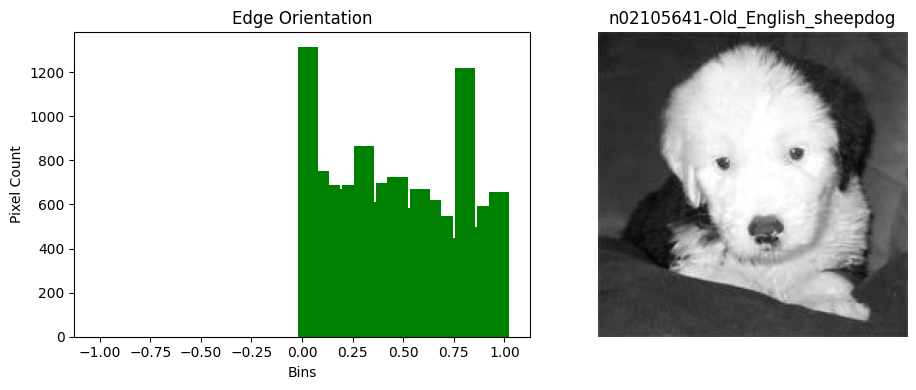

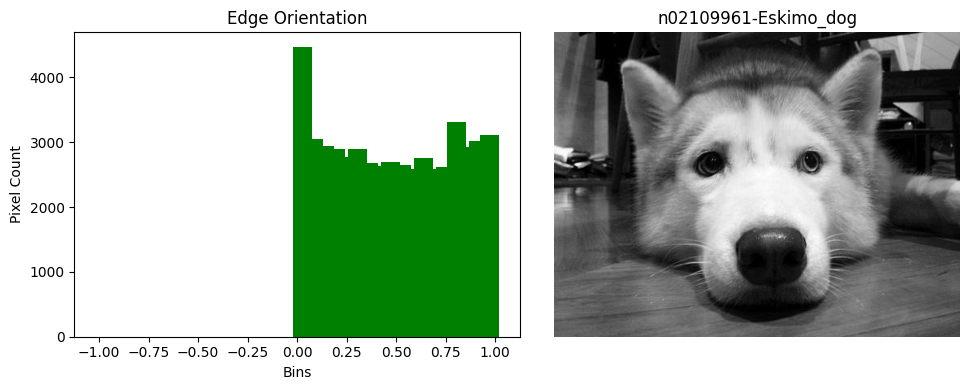

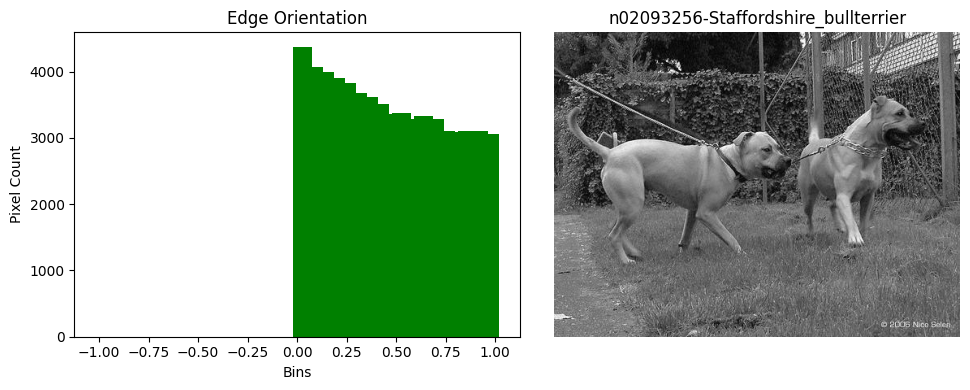

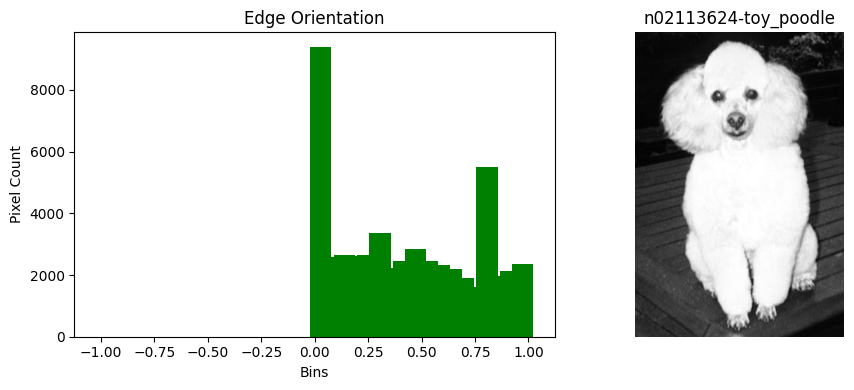

In [27]:
class AnalysisEdgeOrientation:
    def __init__(self, dataset):
        self.root_address = os.getcwd()
        self.images_folder_address = os.path.join(self.root_address, "images")
        self.annotation_folder_address = os.path.join(self.root_address, "Annotation")
        self.dataset = dataset

    def _angle(self, dx, dy):
        return np.mod(np.arctan2(dx, dy), np.pi)

    def plot_graph(self):
        imgs_folder = self.images_folder_address

        for category, name in self.dataset:
            image_path = os.path.join(imgs_folder, category, name)
            img = io.imread(image_path)

            grayImage = color.rgb2gray(img)
            angle = self._angle(filters.sobel_h(grayImage),filters.sobel_v(grayImage))
            hist, hist_centers = exposure.histogram(angle, nbins=36, source_range='dtype')

            plt.figure(figsize=(10,4))
            plt.subplot(1,2,1)
            plt.bar(hist_centers, hist, width=0.1, align="center", color = "green")
            plt.xlabel("Bins")
            plt.ylabel("Pixel Count")
            plt.title("Edge Orientation")

            plt.subplot(1,2,2)
            plt.imshow(grayImage, cmap="gray")
            plt.title(f"{category}")
            plt.axis("off")

            plt.tight_layout()
            plt.show()

selected_dataset = [
    ("n02105641-Old_English_sheepdog", "n02105641_10397.jpg"),
    ("n02109961-Eskimo_dog", "n02109961_11634.jpg"),
    ("n02093256-Staffordshire_bullterrier", "n02093256_11806.jpg"),
    ("n02113624-toy_poodle", "n02113624_1077.jpg")
]

analysis = AnalysisEdgeOrientation(selected_dataset)
analysis.plot_graph()


## 2d :

In [28]:
from skimage import io, color, filters, exposure
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances,cosine_distances
import numpy as np
import matplotlib.pyplot as plt

In [34]:
class Comparison:
    def __init__(self, dataset):
        self.root_address = os.getcwd()
        self.images_folder_address = os.path.join(self.root_address, "images")
        self.annotation_folder_address = os.path.join(self.root_address, "Annotation")
        self.dataset = dataset

    def _angle(self, dx, dy):
        return np.mod(np.arctan2(dx,dy), np.pi)

    def _edge_hist(self, img):
        gray_img = color.rgb2gray(img)
        angles = self._angle(filters.sobel_h(gray_img), filters.sobel_v(gray_img))
        hist, _ = np.histogram(angles, bins=36, range=(-np.pi, np.pi))
        return hist

    def _process(self):
        edge_hist_value = {}
        for category, name in self.dataset:
            imgPath = os.path.join(self.images_folder_address, category, name)
            img = io.imread(imgPath)
            hist = self._edge_hist(img)
            edge_hist_value[name] = hist
        return edge_hist_value

    def compare(self, title):
        edgeHist = self._process()
        histos = list(edgeHist.values())
        imgNames = list(edgeHist.keys())

        euclideanDist = euclidean_distances(histos)
        manhattanDist = manhattan_distances(histos)
        cosineDist = cosine_distances(histos)

        print(title)
        for i in range(len(imgNames)):
            for j in range(i + 1, len(imgNames)):
                print(f"Euclidean: {euclideanDist[i][j]}")
                print(f"Manhattan: {manhattanDist[i][j]}")
                print(f"Cosine: {cosineDist[i][j]}")    

In [35]:
compare1 = Comparison([
    ("n02105641-Old_English_sheepdog", "n02105641_11387.jpg"),
    ("n02105641-Old_English_sheepdog", "n02105641_12614.jpg")
])
compare1.compare("Comparison between two images of same class")

print("\n")
compare2 = Comparison([
    ("n02109961-Eskimo_dog", "n02109961_12719.jpg"),
    ("n02113624-toy_poodle", "n02113624_1293.jpg")
])
compare2.compare("Comparison between two images of different class")

Comparison between two images of same class
Euclidean: 16069.925886574587
Manhattan: 44392.0
Cosine: 0.05799911145454051


Comparison between two images of different class
Euclidean: 36185.7534949875
Manhattan: 82294.0
Cosine: 0.09860838392678195


## 2e :

In [36]:
from skimage import io, exposure
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt

In [43]:
class AnalysisByHOG:
    def __init__(self):
        self.root_address = os.getcwd()
        self.images_folder_address = os.path.join(self.root_address, "images")
        self.annotation_folder_address = os.path.join(self.root_address, "Annotation")

    def get_image_and_plot_graph(self, imgPath, orientations = 8, pixels_per_cell = (16,16), cells_per_block = (1,1)):
        img = io.imread(imgPath)
        fd, hogImg = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True, channel_axis=-1)

        hogRescaled_img = exposure.rescale_intensity(hogImg, out_range=(0,255))
        plt.figure(figsize=(10,5))

        plt.subplot(1,2,1)
        plt.imshow(img, cmap=plt.cm.gary if img.ndim == 2 else None)
        plt.title("Original Image")
        plt.axis('off')
        
        plt.subplot(1,2,2)
        plt.imshow(hogRescaled_img, cmap="gray")
        plt.title("HOG Image")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

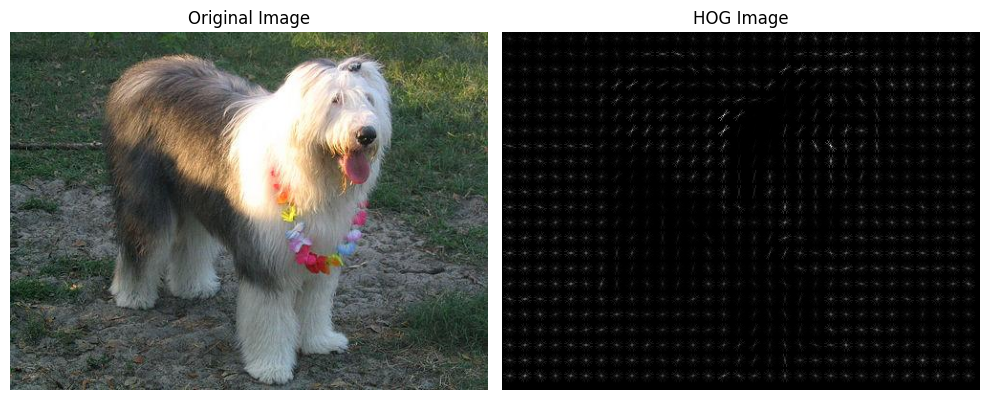

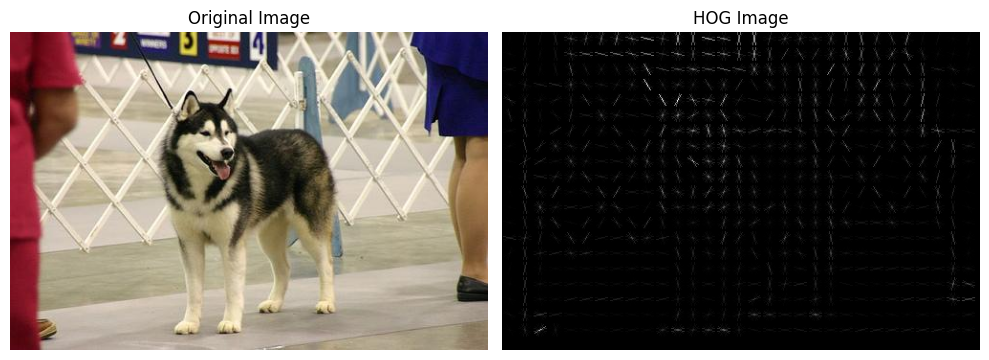

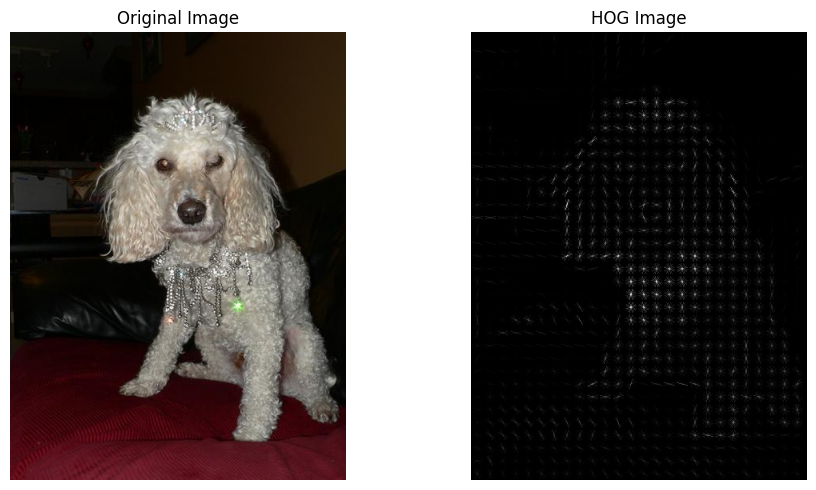

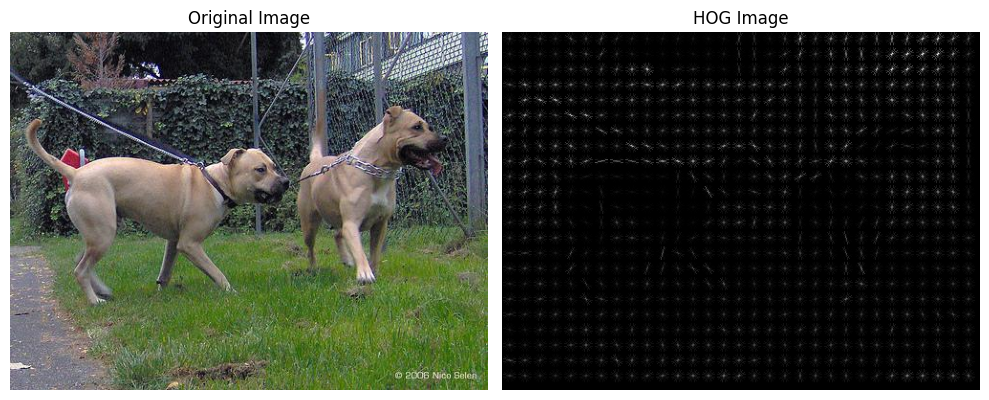

In [46]:
dataset = [
     ("n02105641-Old_English_sheepdog", "n02105641_11387.jpg"),
        ("n02109961-Eskimo_dog", "n02109961_12719.jpg"),
        ("n02113624-toy_poodle", "n02113624_1293.jpg"),
    ("n02093256-Staffordshire_bullterrier", "n02093256_11806.jpg"),
]

analysisByHOG = AnalysisByHOG()

for category, name in dataset:
    img_path = "images/" + category + "/" + name
    analysisByHOG.get_image_and_plot_graph(img_path)


## 2f:

In [47]:
from skimage import io, color, filters
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA

In [54]:
class AnalysisOfImagesUsingPCA:
    def _angle(self, dx, dy):
        return np.mod(np.arctan2(dx,dy), np.pi)

    def _edge_hist(self, img):
        gray_img = color.rgb2gray(img)
        angles = self._angle(filters.sobel_h(gray_img), filters.sobel_v(gray_img))
        hist, _ = np.histogram(angles, bins=36, range=(-np.pi, np.pi))
        return hist

    def getParticularClassImages(self, folder):
        images = []
        for name in os.listdir(folder):
            if name.lower().endswith(".jpg"):
                images.append(os.path.join(folder, name))
        return images

    def perform_pca(self, class1, class2):
        hists = []
        labels = []
        two_classes = class1 + class2

        for image_path in two_classes:
            img = io.imread(image_path)
            hist = self._edge_hist(img)
            hists.append(hist)
            labels.append("Class 1" if img_path in class1 else "Class 2")

        _hist_np = np.array(hists)
        std_scalar = StandardScaler()
        _hist_std = std_scalar.fit_transform(_hist_np)

        pca = PCA(n_components=2)
        hist_pca = pca.fit_transform(_hist_std) 

        pca1 = hist_pca[:len(class1)]
        pca2 = hist_pca[:len(class2)]

        plt.scatter(pca1[:, 0], pca1[:, 1], color = "red", label = "Class-1")
        plt.scatter(pca2[:, 0], pca2[:, 1], color = "blue", label = "Class-2")

        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.legend(["Class 1", "Class 2"])
        plt.title("PCA of Image")
        plt.show()

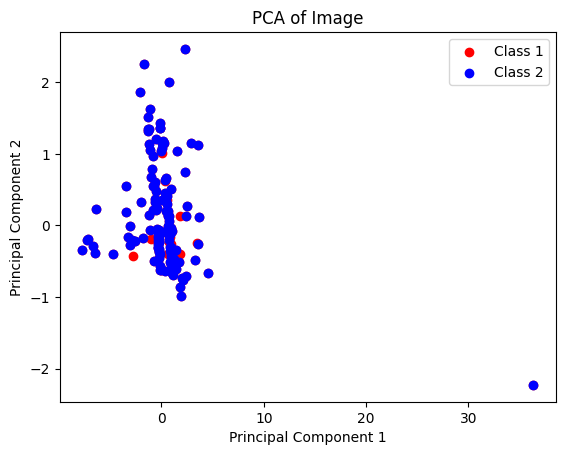

In [55]:
analysisOfImagesUsingPCA = AnalysisOfImagesUsingPCA()
folder1 = analysisOfImagesUsingPCA.getParticularClassImages("images/n02105641-Old_English_sheepdog")
folder2 = analysisOfImagesUsingPCA.getParticularClassImages("images/n02093256-Staffordshire_bullterrier")
analysisOfImagesUsingPCA.perform_pca(folder1, folder2)
